# Método SARIMAX
Esta familia de modelos suele denotarse como SARIMA(p,d,q)(P,D,Q)[m]. Los términos (p,d,q) se refieren a los términos autoregresivos, integrados y de media móvil respectivamente. Los términos (P,D,Q) se refieren a la parte estacional de los mismos términos, con m periodos. En nuestro caso nos interesa una estacionalidad de 24 periodos (horas). El resto de los términos ha sido escogido por ensayo y error (minimizando el AIC). Luego de varias pruebas nos quedamos con la familia SARIMA(2,0,1)x(2,1,0)[24]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_csv('calidadAireURDECON.csv',";",index_col=0,squeeze=True)
df = df[["pm25","pm10","co2","humedad","temperatura","presencia"]]# Quito la última columna
#df = df[["pm25","pm10","co2","humedad","temperatura"]]
df = df[["co2"]]# Solo dejo el CO2 porque vamos a jugar con una sola variable
df = df.drop_duplicates(subset=['co2'], keep="last")  # Elimino los duplicados 
#Los registros van de cada 5 minutos. 12 Registros = 1 hora. 48Registros = 4 horas 
df = df.set_index(pd.to_datetime(df.index, format='%d-%m-%Y %H:%M:%S'))
df = df[:-48] #Me guardo las últimas 4 horas para la predicción
dfUltimas7Horas = df[-48:]
df.head()

,co2
fecha,
2021-10-05 10:39:17,134.77887
2021-10-05 10:44:17,139.66228
2021-10-05 10:49:17,159.06667
2021-10-05 10:54:17,121.99109
2021-10-05 10:59:18,116.49886


# Entreno el modelo


In [29]:
x = df

# instanciar modelo
sarima_model = SARIMAX(x, order=(2,0,1), seasonal_order=(2, 1, 0, 24))

# ajustar modelo
results = sarima_model.fit()

# mirar el AIC
results.aic

C:\Users\jgonzalez\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\jgonzalez\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


13999.495011613662

# Predecir las siguientes 4horas

In [30]:
dfUltimas4Horas = df[-48:]
dfUltimas4Horas
print(dfUltimas4Horas.index.min())
print(dfUltimas4Horas.index.max())

2021-10-13 01:22:33
2021-10-13 05:23:28


C:\Users\jgonzalez\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


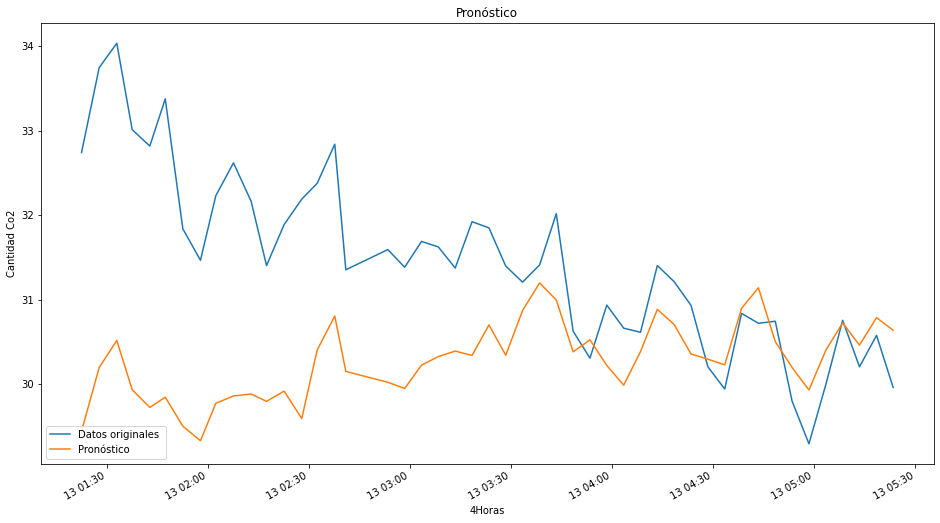

In [31]:
# tomar de datos originales 
df_Siguientes4Horas = df.loc[dfUltimas4Horas.index.min():dfUltimas4Horas.index.max()]
df_Siguientes4Horas.plot()

## agregar bandas de confianza
#pred_Siguientes4Horas_conf = results.get_forecast(steps=48).conf_int()
#pred_Siguientes4Horas_conf.index = df_Siguientes4Horas.index
#x = df_Siguientes4Horas.index
#print(pred_Siguientes4Horas_conf)

#y1 = pred_Siguientes4Horas_conf['lower co2']
#y2 = pred_Siguientes4Horas_conf['upper co2']
#plt.fill_between(x, y1, y2, alpha=0.6)

# predecir para 1-nov y 2-nov
pred_Siguientes4Horas_conf = results.get_forecast(steps=48).predicted_mean
pred_Siguientes4Horas_conf.index = df_Siguientes4Horas.index
pred_Siguientes4Horas_conf.plot()

# formato de la grafica final
plt.title('Pronóstico')
plt.ylabel('Cantidad Co2')
plt.xlabel('4Horas')
plt.legend(('Datos originales ', 'Pronóstico '),
           loc='lower left')
plt.show()